In [ ]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: access shared csv in shared with me

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Replace 'path/to/your/shared/csv' with the actual path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Shared with me/your_csv_file.csv'

try:
  df = pd.read_csv(file_path)
  print("Successfully accessed the shared CSV file.")
  # You can now work with the DataFrame 'df'
  # For example, you can print the first few rows:
  print(df.head())
except FileNotFoundError:
  print("Error: The file was not found at the specified path.")
except Exception as e:
  print(f"An error occurred: {e}")

In [ ]:
litob_female = pd.read_csv('/content/drive/MyDrive/FOURTH YEAR/SP/SP 2024/Chapter3/female.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FOURTH YEAR/SP/SP 2024/Chapter3/female.csv'

In [ ]:
litob_male = pd.read_csv('/content/drive/MyDrive/FOURTH YEAR/SP/SP 2024/Chapter3/male.csv')

In [ ]:
litob_female.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48. 05,37.6,32.15,20,33.55,4.1
1,20001,48. 05,37.6,32.15,20,33.55,4.1
2,30001,48. 05,37.6,32.15,20,33.55,4.1
3,40001,48. 05,37.6,32.15,20,33.55,4.1
4,50001,48. 05,37.6,32.15,20,33.55,4.1


In [ ]:
litob_female['label'] = 0
litob_male['label'] = 1

In [ ]:
litob_female.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,label
0,10001,48. 05,37.6,32.15,20,33.55,4.1,0
1,20001,48. 05,37.6,32.15,20,33.55,4.1,0
2,30001,48. 05,37.6,32.15,20,33.55,4.1,0
3,40001,48. 05,37.6,32.15,20,33.55,4.1,0
4,50001,48. 05,37.6,32.15,20,33.55,4.1,0


In [ ]:
litob_male.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,label
0,110004,43.1,33.05,28.15,21.0,28.5,3.05,1
1,120004,43.1,33.05,28.15,21.0,28.5,3.05,1
2,130004,43.1,33.05,28.15,21.0,28.5,3.05,1
3,140004,43.1,33.05,28.15,21.0,28.5,3.05,1
4,150004,43.1,33.05,28.15,21.0,28.5,3.05,1


In [ ]:

litob_combined = pd.concat([litob_female, litob_male], ignore_index=True)

litob_combined.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,label
0,10001,48. 05,37.6,32.15,20.0,33.55,4.1,0
1,20001,48. 05,37.6,32.15,20.0,33.55,4.1,0
2,30001,48. 05,37.6,32.15,20.0,33.55,4.1,0
3,40001,48. 05,37.6,32.15,20.0,33.55,4.1,0
4,50001,48. 05,37.6,32.15,20.0,33.55,4.1,0


<ipython-input-92-4b20340a9e8f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=litob_combined, palette= 'pastel')


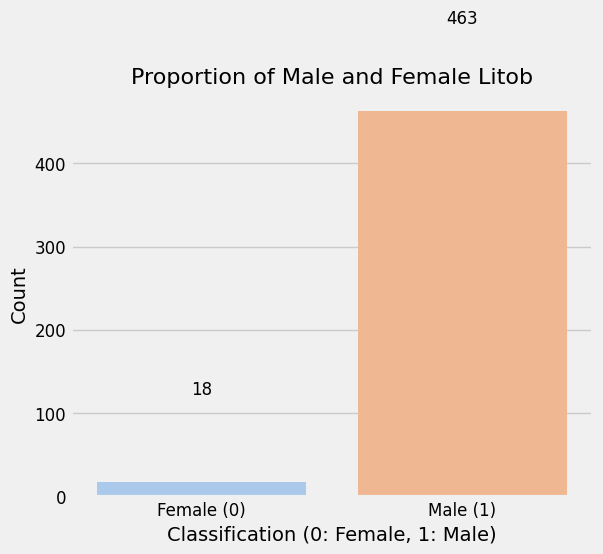

Proportions of Classes:
label
0    0.037422
1    0.962578
Name: count, dtype: float64


In [ ]:
#### plot visualizations for the no. of ham and spam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))
sns.countplot(x='label', data=litob_combined, palette= 'pastel')
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

## calculating the counts
counts = litob_combined['label'].value_counts().sort_index()

for index in counts.index:
    plt.text(index, counts[index] + 100, str(counts[index]), ha='center', va='bottom', fontsize=12)

## plot visualizations
plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()
proportions = counts / counts.sum()
print('Proportions of Classes:')
print(proportions)

In [ ]:
litob_combined.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'label'],
      dtype='object')

In [ ]:
litob_features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos']

In [ ]:
for feature in litob_features:
    if not pd.api.types.is_numeric_dtype(litob_combined[feature]):
        # If not numeric, apply string operations for cleaning
        litob_combined[feature] = litob_combined[feature].astype(str).str.replace(' ', '').str.replace(',', '')
        litob_combined[feature] = pd.to_numeric(litob_combined[feature], errors='coerce')
    else:
        # If already numeric, skip string operations
        print(f"Column '{feature}' is already numeric. Skipping string operations.")

Column 'Width' is already numeric. Skipping string operations.
Column 'Rib count' is already numeric. Skipping string operations.
Column 'Length (Hinge Line)' is already numeric. Skipping string operations.
Column 'Distance Umbos' is already numeric. Skipping string operations.


In [ ]:
x = litob_combined[litob_features]
y = litob_combined['label']

In [ ]:
#from google.colab import files
#litob_combined.to_csv('litob_combined.csv', encoding = 'utf-8-sig')
#files.download('litob_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,label
0,10001,48.05,37.60,32.15,20.0,33.55,4.10,0
1,20001,48.05,37.60,32.15,20.0,33.55,4.10,0
2,30001,48.05,37.60,32.15,20.0,33.55,4.10,0
3,40001,48.05,37.60,32.15,20.0,33.55,4.10,0
4,50001,48.05,37.60,32.15,20.0,33.55,4.10,0
...,...,...,...,...,...,...,...,...
446,120075,58.05,43.05,40.05,20.0,35.10,5.15,1
447,130075,58.05,43.05,40.05,20.0,35.10,5.15,1
448,140075,58.05,43.05,40.05,20.0,35.10,5.15,1
449,150075,58.05,43.05,40.05,20.0,35.10,5.15,1


In [ ]:
litob_combined.dropna(inplace=True)

In [ ]:
x = litob_combined[litob_features]
y = litob_combined['label']

#(A) LOGISTIC REGRESSION

In [ ]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  6,   3],
       [  0, 127]])

Text(0.5, 427.9555555555555, 'Predicted label')

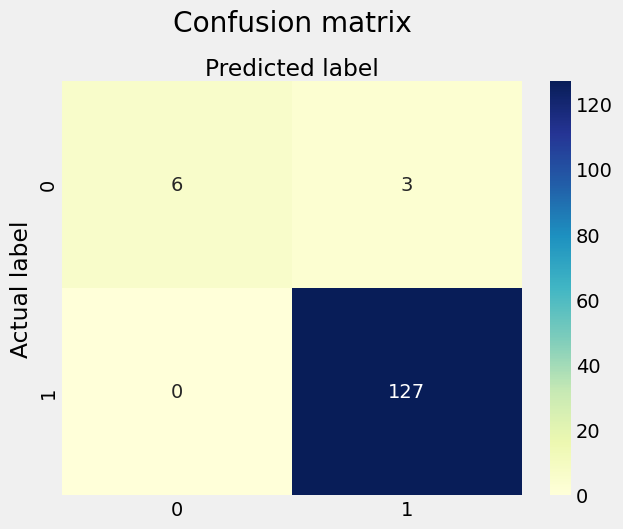

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.98      1.00      0.99       127

    accuracy                           0.98       136
   macro avg       0.99      0.83      0.89       136
weighted avg       0.98      0.98      0.98       136



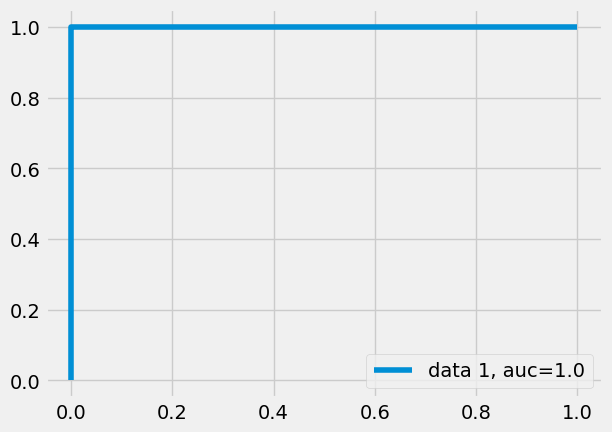

In [ ]:
#roc curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# (B) Extreme Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

# Predict probabilities for ROC curve
y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]

NameError: name 'x_train' is not defined

In [ ]:
# Confusion Matrix
cnf_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):")
print(cnf_matrix_xgb)

NameError: name 'metrics' is not defined

In [ ]:
# Classification Report
print("\nClassification Report (XGBoost):")
print(metrics.classification_report(y_test, y_pred_xgb, target_names=target_names))

In [ ]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

In [ ]:
# Plot ROC Curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve (XGBoost)', fontsize=16)
plt.legend(loc='lower right')
plt.show()